# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Sales forecast final.csv')
testdata=  pd.read_csv('testdata.csv')
dataset.head()

,Week,StoreNum,Category,Sales,Units,profit,week no,Year
0,201649,57,2,679064.37,12885,248695.0438,49,2016
1,201649,57,1,1268409.60,23766,380203.0771,49,2016
2,201649,57,5,94744.94,4205,34604.2306,49,2016
3,201649,57,35,1446.67,87,188.0671,49,2016
4,201649,57,7,1475152.07,24952,581748.4376,49,2016


# Data Preprocessing

In [3]:
#convert week number to int
dataset['week no']=dataset['week no'].astype('int')


In [4]:
#select required columns
data=dataset[['week no','Category','Year','Sales']]
data.head()

,week no,Category,Year,Sales
0,49,2,2016,679064.37
1,49,1,2016,1268409.60
2,49,5,2016,94744.94
3,49,35,2016,1446.67
4,49,7,2016,1475152.07


In [5]:
# Select the dependant and independant variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
#encode categorical variables ('category' and 'Year')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough',sparse_threshold=0)
X=np.array(ct.fit_transform(X))


C:\Users\mp21865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model 

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.01e+06  1.05e+06]
 [ 7.51e+05  1.05e+06]
 [ 6.25e+05  6.39e+05]
 [ 1.95e+06  2.25e+06]
 [ 6.01e+01  4.00e+01]
 [ 2.05e+06  1.27e+06]
 [ 2.75e+05  2.29e+05]
 [ 1.86e+06  2.21e+06]
 [ 9.34e+02  9.95e+02]
 [ 2.63e+06  3.66e+06]
 [ 3.01e+05  3.63e+05]
 [ 3.45e+02  2.40e+02]
 [ 7.80e-02  4.00e-02]
 [ 5.01e+04  5.05e+04]
 [ 9.65e+04  1.12e+05]
 [ 1.40e+06  1.28e+06]
 [ 2.56e+01  3.15e+02]
 [ 2.22e+06  1.78e+06]
 [ 3.89e+05  2.60e+05]
 [ 2.80e+05  2.96e+05]
 [ 4.58e+05  3.41e+05]
 [ 2.66e+02  2.38e+02]
 [ 2.03e+06  2.52e+06]
 [ 1.82e+06  2.25e+06]
 [ 5.67e+05  4.31e+05]
 [ 1.54e+06  1.42e+06]
 [ 4.98e+02  4.58e+02]
 [ 1.50e+06  1.17e+06]
 [ 1.31e+06  2.19e+06]
 [ 1.83e+06  1.01e+06]
 [ 2.64e+06  1.69e+06]
 [ 2.09e+05  2.10e+05]
 [ 5.53e+05  1.40e+05]
 [ 1.01e+05  9.00e+04]
 [ 3.11e+05  2.68e+05]
 [ 3.97e+06  3.82e+06]
 [ 1.44e+05  1.32e+05]
 [ 2.28e+05  2.40e+05]
 [ 1.23e+06  2.35e+06]
 [ 2.19e+05  2.03e+05]
 [ 8.53e+02  9.18e+02]
 [ 3.37e+05  2.20e+05]
 [ 7.80e-02  0.00e+00]
 [ 2.29e+05

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
X_test

array([[ 0.,  1.,  0., ...,  0.,  0., 22.],
       [ 0.,  1.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  1., ...,  1.,  0., 42.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 18.],
       [ 0.,  0.,  0., ...,  1.,  0., 27.],
       [ 0.,  0.,  0., ...,  0.,  0., 47.]])

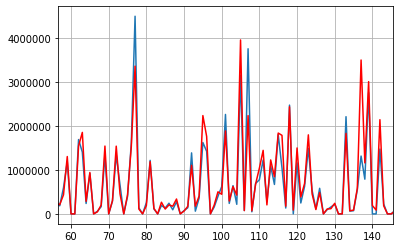

In [11]:
#plotting predicted Vs actual values of test dataset
fig, ax = plt.subplots()  
ax.plot(y_test)
ax.plot(y_pred, color='red')
    
ax.xaxis.zoom(3) 
   
ax.grid()

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.47 %
Standard Deviation: 4.99 %
